In [3]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib. pyplot as plt
import numpy as np
import random
import math
import scipy.spatial.distance as dist
%matplotlib inline

#### 3) Calcula la función de correlación para cada una de las cajas de datos del inciso anterior, usando los estimadores de

    a) Peebles-Hauser

    b) Davis-Peebles

    c) Hamilton

    d) Landy-Szalay

y recuerda escoger un bin adecuado para ver las señales. Utiliza 10 veces el número de puntos en las muestras aleatorias que con los datos.

Hacemos una función para calcular la distancia entre puntos del mismo arreglo

In [4]:
def dis_NN(m): 
    a = []
    b = []
    dis = []
    for i in range(len(m)):
        a.append(m[:,0]-m[:,0][i]) #guardamos las difrerencias en x
        b.append(m[:,1]-m[:,1][i]) #guardamos las difrerencias en y
    dis = np.sqrt(np.power(a,2)+np.power(b,2)) #sacamos la distancias con pitagoras
    return dis.reshape(-1) #regresa un arreglo unidimencional.

Hacemos una funcion para calcular la distancia entre puntos del dos arreglos 

In [5]:
def dis_MN(m,n):
    a = []
    b = []
    dis = []
    for i in range(len(m)):
        a.append(n[:,0]-m[:,0][i]) #guardamos las difrerencias en x
        b.append(n[:,1]-m[:,1][i]) #guardamos las difrerencias en y
    dis = np.sqrt(np.power(a,2)+np.power(b,2)) #sacamos la distancias con pitagoras
    return dis.reshape(-1) #regresa un arreglo unidimencional.

Definimos una función para hacer el hitograma de las distancias.

In [6]:
def Histo_dist (Dist,bins_0):
    frec, b = np.histogram(Dist, bins = bins_0)
    plt.figure()
    histo_2d = np.array(Dist) 
    plt.figure()
    plt.hist(histo_2d, bins=bins_0)
    plt.title("Histograma de distancias",fontsize=18)
    plt.ylabel("Frecuencia",fontsize=18) 
    plt.xlabel("Distancia",fontsize=18)
    plt.show()
    return frec, b

### Hacemos las funciones de corelación:
#### Peebles-Hauser

In [7]:
def Pee_Hau(DD,RR,Nd,Nr):
    n = (Nr*(Nr-1))/(Nd*(Nd-1))
    return ((np.divide(DD,RR))*n) -1

#### Davis-Peebles

In [8]:
def Dav_Pee(DD,DR,Nd,Nr):
    n = (Nr)/(Nd-1)  
    return ((np.divide(DD,DR))*(n)) - 1

#### Hamilton

In [9]:
def Hamilton(DD,RR,DR,Nd,Nr):
    n = 4* Nd * Nr / ((Nd-1)*(Nr-1))
    return np.divide(DD*RR,np.power(DR,2)) -1 

#### Landy-Szalay

In [10]:
def Lan_Sza(DD,RR,DR,Nd,Nr):
    n_1 = (Nr*(Nr-1))/(Nd*(Nd-1))
    n_2 = (Nr-1)/(Nd)
    return  1 + ((np.divide(DD,RR))*n_1) - 2*((np.divide(DR,RR))*n_2)

### Definimos las funciones para hacer los datos:
#### MALLA

In [11]:
def malla_cuad (tamaño,ret): # Depende del tamaño de la caja y de la distancia entre los puntos. 
    
    DD = [] 
    DD = open('Tabla_Datos_malla.dat',"w")  #abrimos un scrip para manejar los datos.
    c, d = 0, 0
    
    for i in range(int(tamaño/ret)): 
        for j in range(int(tamaño/ret)):
            c, d  = i*ret, j*ret 
            DD.write("%f  \t%f \n" % (c,d))
    DD.close()
    
    return np.loadtxt('Tabla_Datos_malla.dat') 

#### DISCO

In [12]:
def disco_random (rad,puntos): #Depende del radio y la cantidad de puntos dentro de él.
    
    D = []
    D = open('Tabla_Datos_disco.dat',"w")  #abrimos un scrip para manejar los datos.
    
    for i in range(puntos):
        r = pow(random.randrange(0,rad**2,1),0.5) #Radio aleatorio tomando en cuenta el jacobiano.
        th = random.random()*2*math.pi #valor de theta aleatorio, 
        x = r*math.cos(th) # usando la ecuación parametrica del círculo 
        y = r*math.sin(th)
        D.write("%f  \t%f \n" % (x,y)) 
    D.close()
    
    return np.loadtxt('Tabla_Datos_disco.dat')

#### ANILLO

In [13]:
def anillo_random(rad_ex,rad_in,puntos):  #Depende del radio esterior y interior, ademas de la cantidad de puntos dentro de él.
    D = []
    D = open('Tabla_Datos_Aro.dat',"w")  #abrimos un scrip para manejar los datos.
    
    for i in range(puntos):
        r = pow(random.randrange(rad_in**2,rad_ex**2,1),0.5) #puntos aleatorios en un radio interior y uno exterior
        th = random.random()*2*math.pi
        x = r*math.cos(th) 
        y = r*math.sin(th)
        D.write("%f  \t%f \n" % (x,y))
    D.close()
    
    return np.loadtxt('Tabla_Datos_Aro.dat') # u = RR_1[:,0] y v = RR_1[:,1]

#### ANILLOS DISPERSOS

In [14]:
# d) 50 anillos con 100 puntos aleatorios cada uno cuyos centros están distribuidos aleatoriamente sobre la caja
def anillos_randoms_2(num_anillos, puntos, tam_caja):
     
    D_5 = []
    D_5 = open('Tabla_Datos_anillos_aleatorios2.dat',"w")  #abrimos un scrip para manejar los datos.
    
    rad_in = tam_caja/5
    rad_ext = 1 + rad_in
    
    for i in range(num_anillos):
        r_x0 = random.randrange(0,tam_caja,1) # coordenada x donde se ubicará el anillo
        r_y0 = random.randrange(0,tam_caja,1) # coordenada y donde se ubicará el anillo
        
        for j in range(puntos):
            r = pow(random.randrange(rad_in**2,rad_ext**2,1),0.5)
            th = random.random()*2*math.pi
            x = r*math.cos(th) + r_x0
            y = r*math.sin(th) + r_y0
            if 0<x<tam_caja and 0<y<tam_caja:
                D_5.write("%f  \t%f \n" % (x,y))
    D_5.close()
    
    return np.loadtxt('Tabla_Datos_anillos_aleatorios2.dat')

Creamos los datos:

In [15]:
malla = malla_cuad(50,5) #hacemos una malla de tamaño 1000x1000 (10x10 cada reticula)
disco = disco_random(10,400) #Hacemos un disco de radio 100 con 1000 puntos
anillo = anillo_random(10,7,300) # Anillo de radio interno 290 y radio externo 300 con 1000 puntos
anillos_r = anillos_randoms_2(12,100,50)

Calcualamos distancias entre los datos:

In [16]:
dis_malla = dis_NN(malla)

In [17]:
dis_disco = dis_NN(disco)

In [18]:
dis_anillo = dis_NN(anillo)

In [19]:
dis_anillos_r = dis_NN(anillos_r)

Creamos los Datos aleatorios R

In [20]:
def caja_Rand(dim,puntos): 
    R = open('Tabla_Aleatorios.dat',"w") #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        a, b = 0, 0 #iniciamos las variables
        a = random.random()*dim #random.random sólo da valores entre 0 y 1 por lo que lo multiplico por la dimención de la caja
        b = random.random()*dim
        R.write("%f  \t%f \n" % (a,b)) #escribimos los valores en el scip.
    R.close()
    return np.loadtxt('Tabla_Aleatorios.dat') # x = RR[:,0] | y = RR[:,1]

In [21]:
dimencion = 100
puntos = len(malla)*10
R_malla = caja_Rand(dimencion,puntos) #hacemos la caja

In [22]:
dimencion = 100
puntos = len(disco)*10
R_disco = caja_Rand(dimencion,puntos) #hacemos la caja

In [23]:
dimencion = 100
puntos = len(anillo)*10
R_anillo = caja_Rand(dimencion,puntos) #hacemos la caja

In [24]:
dimencion = 50
puntos = len(anillos_r)*10
R_anillos_r = caja_Rand(dimencion,puntos) #hacemos la caja

Obtenemos las distancias entre los datos aleatorios:

In [25]:
dis_R_malla = dis_NN(R_malla) #arreglo de distancias

In [26]:
dis_R_disco = dis_NN(R_disco) 

In [27]:
dis_R_anillo = dis_NN(R_anillo) 

In [28]:
dis_R_anillos_r = dis_NN(R_anillos_r)

Distancias DR:

In [29]:
dis_DR_malla = dis_MN(malla,R_malla)

In [30]:
dis_DR_disco = dis_MN(disco,R_disco)

In [31]:
dis_DR_anillo= dis_MN(anillo,R_anillo)

In [32]:
dis_DR_anillos_r = dis_MN(anillos_r,R_anillos_r)

#### a) MALLA

<Figure size 432x288 with 0 Axes>

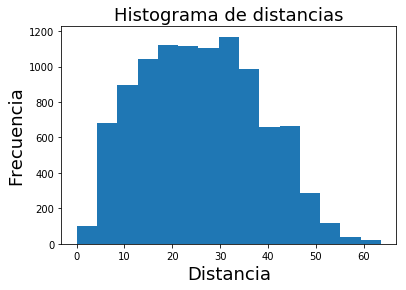

In [58]:
binn = 15
DD_malla, bins_D_malla = Histo_dist(dis_malla,binn)

<Figure size 432x288 with 0 Axes>

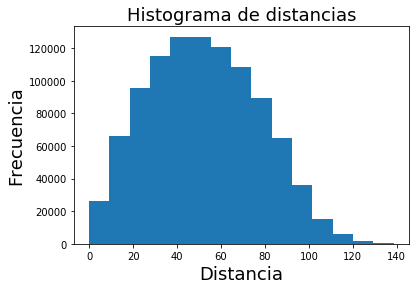

In [59]:
RR_malla, bins_R_malla = Histo_dist(dis_R_malla,binn)

<Figure size 432x288 with 0 Axes>

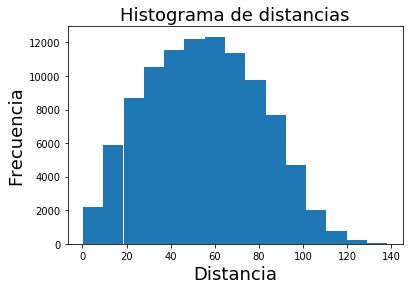

In [60]:
DR_malla, bins_DR_malla = Histo_dist(dis_DR_malla,binn)

In [61]:
PH_malla = Pee_Hau(DD_malla,RR_malla,len(malla),len(R_malla))
DP_malla = Dav_Pee(DD_malla,DR_malla,len(malla),len(R_malla))
HM_malla = Hamilton(DD_malla,RR_malla,DR_malla,len(malla),len(R_malla))
LS_malla = Lan_Sza(DD_malla,RR_malla,DR_malla,len(malla),len(R_malla))

(-1, 1)

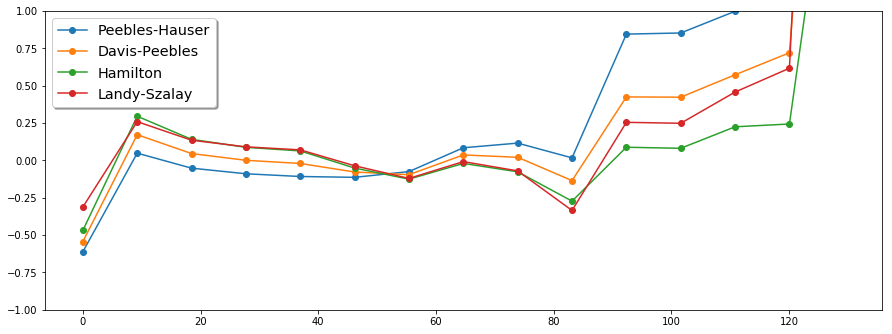

In [62]:
plt.figure(figsize=(15,5.5))
plt.plot(bins_R_malla[:-1],PH_malla,'o-',label='Peebles-Hauser')
plt.plot(bins_R_malla[:-1],DP_malla,'o-',label='Davis-Peebles')
plt.plot(bins_R_malla[:-1],HM_malla,'o-',label='Hamilton')
plt.plot(bins_R_malla[:-1],LS_malla,'o-',label='Landy-Szalay')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.ylim(-1,1)

#### b) DISCO

<Figure size 432x288 with 0 Axes>

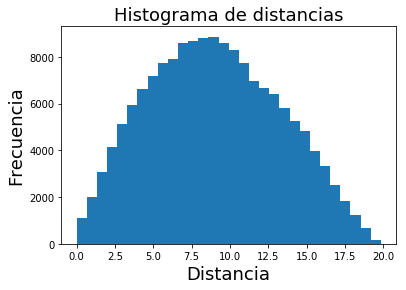

In [67]:
binn = 30
DD_disco, bins_D_disco = Histo_dist(dis_disco,binn)

<Figure size 432x288 with 0 Axes>

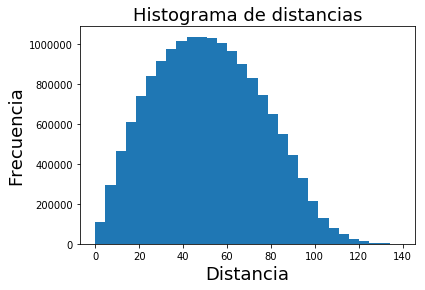

In [68]:
RR_disco, bins_R_disco = Histo_dist(dis_R_disco,binn)

<Figure size 432x288 with 0 Axes>

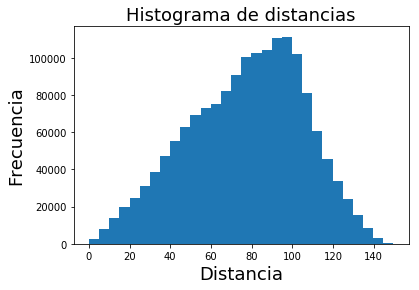

In [69]:
DR_disco, bins_DR_disco = Histo_dist(dis_DR_disco,binn)

In [70]:
PH_disco = Pee_Hau(DD_disco,RR_disco,len(disco),len(R_disco))
DP_disco = Dav_Pee(DD_disco,DR_disco,len(disco),len(R_disco))
HM_disco = Hamilton(DD_disco,RR_disco,DR_disco,len(disco),len(R_disco))
LS_disco = Lan_Sza(DD_disco,RR_disco,DR_disco,len(disco),len(R_disco))

(-5, 5)

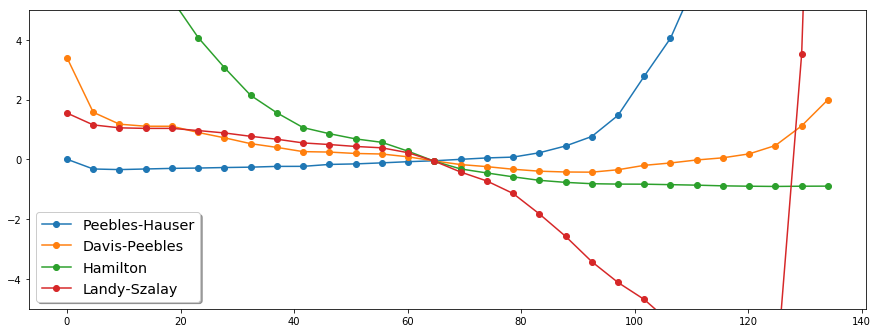

In [75]:
plt.figure(figsize=(15,5.5))
plt.plot(bins_R_disco[:-1],PH_disco,'o-',label='Peebles-Hauser')
plt.plot(bins_R_disco[:-1],DP_disco,'o-',label='Davis-Peebles')
plt.plot(bins_R_disco[:-1],HM_disco,'o-',label='Hamilton')
plt.plot(bins_R_disco[:-1],LS_disco,'o-',label='Landy-Szalay')
plt.legend(shadow=True, fontsize='x-large')
plt.ylim(-5,5)

#### c) Hamilton

<Figure size 432x288 with 0 Axes>

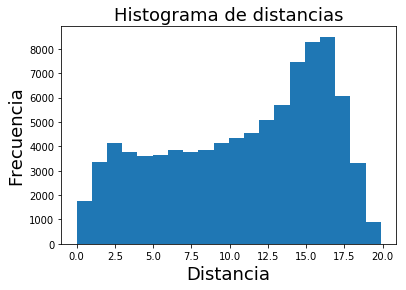

In [82]:
binn =20
DD_anillo, bins_D_anillo = Histo_dist(dis_anillo,binn)

<Figure size 432x288 with 0 Axes>

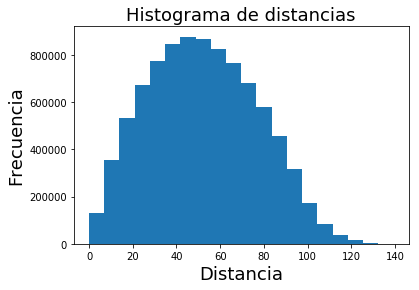

In [83]:
RR_anillo, bins_R_anillo = Histo_dist(dis_R_anillo,binn)

<Figure size 432x288 with 0 Axes>

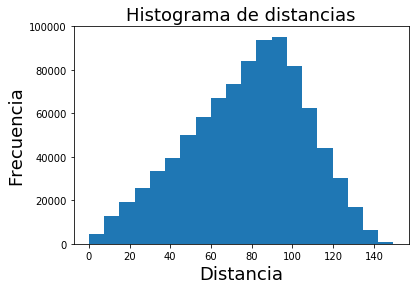

In [84]:
DR_anillo, bins_DR_anillo = Histo_dist(dis_DR_anillo,binn)

In [85]:
PH_anillo = Pee_Hau(DD_anillo,RR_anillo,len(anillo),len(R_anillo))
DP_anillo = Dav_Pee(DD_anillo,DR_anillo,len(anillo),len(R_anillo))
HM_anillo = Hamilton(DD_anillo,RR_anillo,DR_anillo,len(anillo),len(R_anillo))
LS_anillo = Lan_Sza(DD_anillo,RR_anillo,DR_anillo,len(anillo),len(R_anillo))

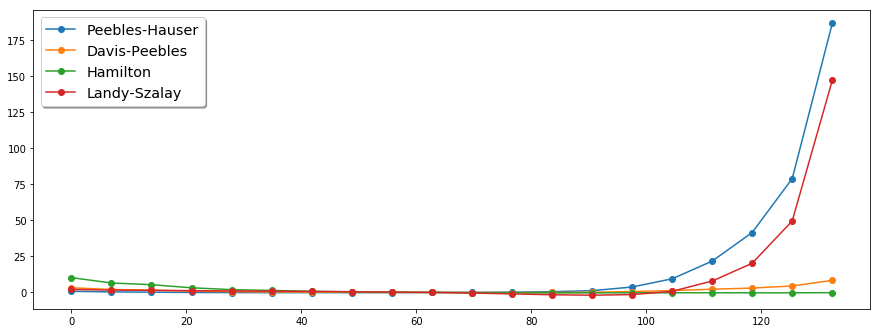

In [87]:
plt.figure(figsize=(15,5.5))
plt.plot(bins_R_anillo[:-1],PH_anillo,'o-',label='Peebles-Hauser')
plt.plot(bins_R_anillo[:-1],DP_anillo,'o-',label='Davis-Peebles')
plt.plot(bins_R_anillo[:-1],HM_anillo,'o-',label='Hamilton')
plt.plot(bins_R_anillo[:-1],LS_anillo,'o-',label='Landy-Szalay')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
#plt.ylim(-2,2)

<Figure size 432x288 with 0 Axes>

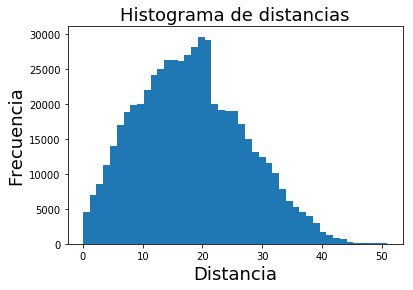

In [160]:
binn = 45
DD_anillos_r, bins_D_anillos_r = Histo_dist(dis_anillos_r,binn)

<Figure size 432x288 with 0 Axes>

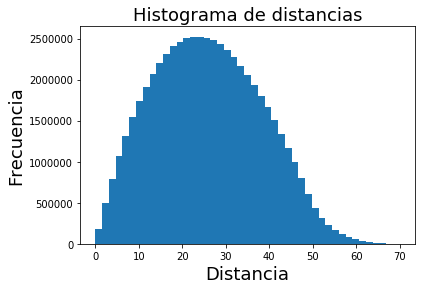

In [161]:
RR_anillos_r, bins_R_anillos_r = Histo_dist(dis_R_anillos_r,binn)

<Figure size 432x288 with 0 Axes>

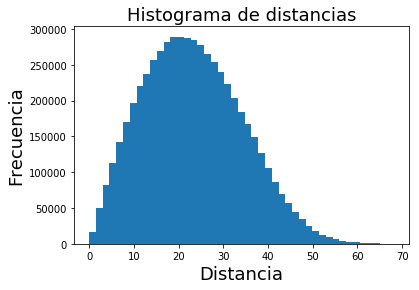

In [162]:
DR_anillos_r, bins_DR_anillos_r = Histo_dist(dis_DR_anillos_r,binn)

In [163]:
PH_anillos_r = Pee_Hau(DD_anillos_r,RR_anillos_r,len(anillos_r),len(R_anillos_r))
DP_anillos_r = Dav_Pee(DD_anillos_r,DR_anillos_r,len(anillos_r),len(R_anillos_r))
HM_anillos_r = Hamilton(DD_anillos_r,RR_anillos_r,DR_anillos_r,len(anillos_r),len(R_anillos_r))
LS_anillos_r = Lan_Sza(DD_anillos_r,RR_anillos_r,DR_anillos_r,len(anillos_r),len(R_anillos_r))

(-1, 45)

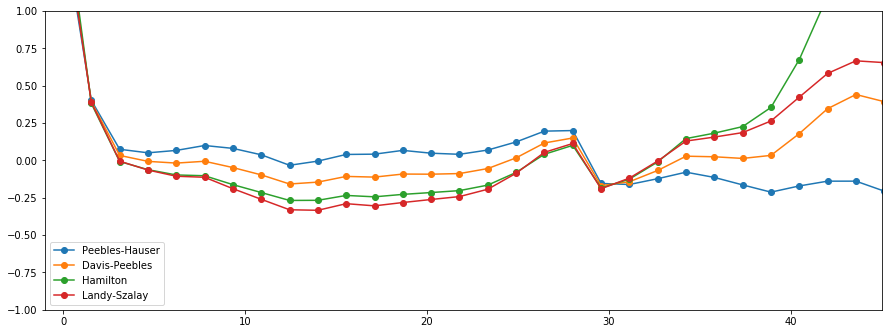

In [164]:
plt.figure(figsize=(15,5.5))
plt.plot(bins_R_anillos_r[:-1],PH_anillos_r,'o-',label='Peebles-Hauser')
plt.plot(bins_R_anillos_r[:-1],DP_anillos_r,'o-',label='Davis-Peebles')
plt.plot(bins_R_anillos_r[:-1],HM_anillos_r,'o-',label='Hamilton')
plt.plot(bins_R_anillos_r[:-1],LS_anillos_r,'o-',label='Landy-Szalay')
plt.legend()
plt.ylim(-1,1)
plt.xlim(-1,45)